# Importing libraries/defining settings/reading file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 81)

In [2]:
input_file = "../data/transformed/Kickstarter_hist.csv"
df_kickstarter = pd.read_csv(input_file)

# Overview of table

**Show head**

In [3]:
df_kickstarter.head()

,slug,category_lvl1,category_lvl2,country,created_at,deadline,usd_goal,usd_pledged,backers_count,project_url,extract_date,state_defined,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country
0,project-flint,crafts,printing,US,2016-01-22 04:34:34,2016-02-12 02:31:03,63000.00000,0.0,0,https://www.kickstarter.com/projects/157647630...,2016-01-28 00:00:00,failed/canceled,6.967916,10.732062,1.703686
1,gaint-surprise,design,product design,GB,2016-01-16 15:15:32,2016-02-18 20:23:13,7137.31045,0.0,0,https://www.kickstarter.com/projects/130637401...,2016-01-28 00:00:00,failed/canceled,0.260486,0.323656,0.415820
2,the-stakk,design,product design,US,2016-01-03 15:00:18,2016-02-02 18:35:00,5000.00000,0.0,0,https://www.kickstarter.com/projects/124810776...,2016-01-28 00:00:00,failed/canceled,0.182482,0.226735,0.135213
3,down-syndrome-awareness-bracelets-shirts-hats,design,product design,US,2016-01-22 05:24:22,2016-02-21 05:24:00,1500.00000,0.0,0,https://www.kickstarter.com/projects/215592288...,2016-01-28 00:00:00,failed/canceled,0.054744,0.068021,0.040564
4,ta-boxes-a-new-electrical-box-to-simplify-snaking,design,product design,US,2016-01-03 14:25:19,2016-03-04 21:07:48,150000.00000,31.0,2,https://www.kickstarter.com/projects/145298163...,2016-01-28 00:00:00,failed/canceled,5.474449,6.802050,4.056395


**Find the total number of rows and columns with the shape attribute**

In [4]:
# first value shows #rows, second value #columns
df_kickstarter.shape

(184423, 15)

**Show data types**

In [5]:
df_kickstarter.dtypes

slug                         object
category_lvl1                object
category_lvl2                object
country                      object
created_at                   object
deadline                     object
usd_goal                    float64
usd_pledged                 float64
backers_count                 int64
project_url                  object
extract_date                 object
state_defined                object
goal_ratio_category_lvl1    float64
goal_ratio_category_lvl2    float64
goal_ratio_country          float64
dtype: object

**Show # of missing values per column**

In [6]:
df_kickstarter.isna().sum()

slug                            0
category_lvl1                   0
category_lvl2               16627
country                         0
created_at                      0
deadline                        0
usd_goal                        0
usd_pledged                     0
backers_count                   0
project_url                     0
extract_date                    0
state_defined                   0
goal_ratio_category_lvl1        0
goal_ratio_category_lvl2    16627
goal_ratio_country              0
dtype: int64

In [7]:
df_kickstarter.isna().describe()

,slug,category_lvl1,category_lvl2,country,created_at,deadline,usd_goal,usd_pledged,backers_count,project_url,extract_date,state_defined,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country
count,184423,184423,184423,184423,184423,184423,184423,184423,184423,184423,184423,184423,184423,184423,184423
unique,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,184423,184423,167796,184423,184423,184423,184423,184423,184423,184423,184423,184423,184423,167796,184423


**Show only columns with missing values**

In [8]:
null_columns = df_kickstarter.isna().sum()
null_columns[null_columns.gt(0)]

category_lvl2               16627
goal_ratio_category_lvl2    16627
dtype: int64

**Calculating percentage of missing values**

In [9]:
null_prop = null_columns[null_columns.gt(0)] / len(df_kickstarter)
null_columns[null_columns.gt(0)] / len(df_kickstarter)

category_lvl2               0.090157
goal_ratio_category_lvl2    0.090157
dtype: float64

**Show statistics for all columns**

In [10]:
df_kickstarter.describe(include='all')

,slug,category_lvl1,category_lvl2,country,created_at,deadline,usd_goal,usd_pledged,backers_count,project_url,extract_date,state_defined,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country
count,184423,184423,167796,184423,184423,184423,1.844230e+05,1.844230e+05,184423.000000,184423,184423,184423,184423.000000,167796.000000,184423.000000
unique,146412,15,145,22,146306,136326,NaN,NaN,NaN,184423,47,2,NaN,NaN,NaN
top,broken-dolls-zine,games,product design,US,2018-06-04 20:13:54,2018-07-04 03:59:00,NaN,NaN,NaN,https://www.kickstarter.com/projects/apartforl...,2017-03-15 00:00:00,failed/canceled,NaN,NaN,NaN
freq,4,24703,14595,114209,4,110,NaN,NaN,NaN,1,33625,103507,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.445433e+04,1.357929e+04,149.786231,NaN,NaN,NaN,1.006748,1.004533,1.007320
std,NaN,NaN,NaN,NaN,NaN,NaN,8.822500e+05,1.136101e+05,948.496367,NaN,NaN,NaN,21.612812,9.364566,21.781851
min,NaN,NaN,NaN,NaN,NaN,NaN,6.436000e-01,0.000000e+00,0.000000,NaN,NaN,NaN,0.000006,0.000010,0.000016
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+03,6.017871e+01,3.000000,NaN,NaN,NaN,0.059190,0.087752,0.052584
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+03,9.020000e+02,18.000000,NaN,NaN,NaN,0.212897,0.287006,0.162256
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+04,5.318705e+03,78.000000,NaN,NaN,NaN,0.602510,0.795942,0.478152


----

# Distribution categorical columns

## Analysis of Categories (lvl1/lvl2)

**Show absolute/relativ value counts**

*lvl1 categories*

In [11]:
# number of lvl1 categories
df_kickstarter.category_lvl1.nunique()

15

In [12]:
#summary statistics of the numerical values of lvl1
df_kickstarter.category_lvl1.describe()

count     184423
unique        15
top        games
freq       24703
Name: category_lvl1, dtype: object

In [13]:
#lvl1 - absolute value counts
df_kickstarter.category_lvl1.value_counts()

games           24703
film & video    20286
technology      19870
design          18039
publishing      17937
art             16135
fashion         15946
music           15897
food            11010
comics           8771
crafts           4745
photography      3828
theater          3513
journalism       2443
dance            1300
Name: category_lvl1, dtype: int64

In [14]:
#lvl1 - relative value counts
df_kickstarter.category_lvl1.value_counts(normalize=True)

games           0.133948
film & video    0.109997
technology      0.107741
design          0.097813
publishing      0.097260
art             0.087489
fashion         0.086464
music           0.086199
food            0.059700
comics          0.047559
crafts          0.025729
photography     0.020757
theater         0.019049
journalism      0.013247
dance           0.007049
Name: category_lvl1, dtype: float64

*lvl2 categories*

In [15]:
# number of lvl2 categories
df_kickstarter.category_lvl2.nunique()

145

In [16]:
#summary statistics of the numerical values of lvl2
df_kickstarter.category_lvl2.describe()

count             167796
unique               145
top       product design
freq               14595
Name: category_lvl2, dtype: object

In [17]:
#lvl2 - absolute value counts
df_kickstarter.category_lvl2.value_counts()

product design        14595
tabletop games        12554
apparel                5751
accessories            5406
video games            5372
apps                   5242
comic books            3966
illustration           3896
documentary            3765
children's books       3686
playing cards          3291
web                    3238
fiction                2929
nonfiction             2877
gadgets                2871
graphic novels         2457
comedy                 2398
shorts                 2310
restaurants            2137
drinks                 2123
drama                  2036
hardware               1738
art books              1715
software               1673
country & folk         1643
hip-hop                1550
painting               1541
photobooks             1487
rock                   1470
mixed media            1443
jewelry                1430
webseries              1403
mobile games           1402
digital art            1338
graphic design         1321
small batch         

In [18]:
#lvl2 - relative value counts
df_kickstarter.category_lvl2.value_counts(normalize=True)

product design        0.086981
tabletop games        0.074817
apparel               0.034274
accessories           0.032218
video games           0.032015
apps                  0.031240
comic books           0.023636
illustration          0.023219
documentary           0.022438
children's books      0.021967
playing cards         0.019613
web                   0.019297
fiction               0.017456
nonfiction            0.017146
gadgets               0.017110
graphic novels        0.014643
comedy                0.014291
shorts                0.013767
restaurants           0.012736
drinks                0.012652
drama                 0.012134
hardware              0.010358
art books             0.010221
software              0.009970
country & folk        0.009792
hip-hop               0.009237
painting              0.009184
photobooks            0.008862
rock                  0.008761
mixed media           0.008600
jewelry               0.008522
webseries             0.008361
mobile g

In [19]:
df_kickstarter.groupby(['category_lvl1']).count()

,slug,category_lvl2,country,created_at,deadline,usd_goal,usd_pledged,backers_count,project_url,extract_date,state_defined,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country
category_lvl1,,,,,,,,,,,,,,
art,16135,12387,16135,16135,16135,16135,16135,16135,16135,16135,16135,16135,12387,16135
comics,8771,8012,8771,8771,8771,8771,8771,8771,8771,8771,8771,8771,8012,8771
crafts,4745,3489,4745,4745,4745,4745,4745,4745,4745,4745,4745,4745,3489,4745
dance,1300,1123,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1123,1300
design,18039,17039,18039,18039,18039,18039,18039,18039,18039,18039,18039,18039,17039,18039
fashion,15946,15206,15946,15946,15946,15946,15946,15946,15946,15946,15946,15946,15206,15946
film & video,20286,19171,20286,20286,20286,20286,20286,20286,20286,20286,20286,20286,19171,20286
food,11010,9892,11010,11010,11010,11010,11010,11010,11010,11010,11010,11010,9892,11010
games,24703,24090,24703,24703,24703,24703,24703,24703,24703,24703,24703,24703,24090,24703


**LVL2 Categories per LVL1 Category**

In [20]:
#show the lvl2 categories for each lvl1 category
df_kickstarter[['category_lvl1','category_lvl2']].groupby(['category_lvl1','category_lvl2']).count()

Empty DataFrame
Columns: []
Index: [(art, ceramics), (art, conceptual art), (art, digital art), (art, illustration), (art, installations), (art, mixed media), (art, painting), (art, performance art), (art, public art), (art, sculpture), (art, social practice), (art, textiles), (art, video art), (comics, anthologies), (comics, comic books), (comics, events), (comics, graphic novels), (comics, webcomics), (crafts, candles), (crafts, crochet), (crafts, diy), (crafts, embroidery), (crafts, glass), (crafts, knitting), (crafts, letterpress), (crafts, pottery), (crafts, printing), (crafts, quilts), (crafts, stationery), (crafts, taxidermy), (crafts, weaving), (crafts, woodworking), (dance, performances), (dance, residencies), (dance, spaces), (dance, workshops), (design, architecture), (design, civic design), (design, graphic design), (design, interactive design), (design, product design), (design, typography), (fashion, accessories), (fashion, apparel), (fashion, childrenswear), (fashion, couture), (fashion, footwear), (fashion, jewelry), (fashion, pet fashion), (fashion, ready-to-wear), (film & video, action), (film & video, animation), (film & video, comedy), (film & video, documentary), (film & video, drama), (film & video, experimental), (film & video, family), (film & video, fantasy), (film & video, festivals), (film & video, horror), (film & video, movie theaters), (film & video, music videos), (film & video, narrative film), (film & video, romance), (film & video, science fiction), (film & video, shorts), (film & video, television), (film & video, thrillers), (film & video, webseries), (food, bacon), (food, community gardens), (food, cookbooks), (food, drinks), (food, events), (food, farmer's markets), (food, farms), (food, food trucks), (food, restaurants), (food, small batch), (food, spaces), (food, vegan), (games, gaming hardware), (games, live games), (games, mobile games), (games, playing cards), (games, puzzles), (games, tabletop games), (games, video games), (journalism, audio), (journalism, photo), (journalism, print), (journalism, video), (journalism, web), (music, blues), (music, chiptune), (music, classical music), (music, comedy), (music, country & folk), (music, electronic music), (music, faith), ...]

**Summary statistics category_lvl1**

In [21]:
df_kickstarter.groupby(['category_lvl1']).describe()

usd_goal                                                       \
                 count           mean           std        min          25%   
category_lvl1                                                                 
art            16135.0   26279.183011  1.006262e+06   1.000000   454.794373   
comics          8771.0    6155.379550  1.893825e+04   0.716763  1000.000000   
crafts          4745.0    9084.861640  3.731093e+04   1.000000   636.849380   
dance           1300.0   11090.287461  6.238835e+04  70.000000  2000.000000   
design         18039.0   27507.530827  2.271604e+05   1.000000  2874.780330   
fashion        15946.0   14284.246877  1.643924e+05   0.891703   850.000000   
film & video   20286.0  103662.575269  2.120077e+06   0.644377  2000.000000   
food           11010.0   36564.632231  2.574407e+05   1.000000  5000.000000   
games          24703.0   22286.865758  2.008691e+05   0.735634  1612.134544   
journalism      2443.0   69522.507740  2.047202e+06   1.320538  1500.000000   
music          15897.0   14147.772375  1.202468e+05   0.643600  1700.000000   
photography     3828.0   12288.659483  1.119706e+05   1.000000  1312.465140   
publishing     17937.0   16173.596683  7.527860e+05   1.000000  1500.000000   
technology     19870.0   60805.904457  7.670941e+05   0.752649  5500.000000   
theater         3513.0   28044.121264  3.429725e+05   1.000000  1354.969490   

                                                       usd_pledged  \
                        50%           75%          max       count   
category_lvl1                                                        
art             1347.784584   5000.000000  100000000.0     16135.0   
comics          2500.000000   6000.000000     800000.0      8771.0   
crafts          2000.000000   6678.316620    1200000.0      4745.0   
dance           4000.000000   8000.000000    2000000.0      1300.0   
design         10000.000000  22040.793900   20000000.0     18039.0   
fashion         4000.000000  11737.409950   17917507.8     15946.0   
film & video    5758.371928  18000.000000  105999014.0     20286.0   
food           11966.568600  28000.000000   22000000.0     11010.0   
games           5600.000000  15000.000000   13753001.6     24703.0   
journalism      5000.000000  15000.000000  100000000.0      2443.0   
music           4000.000000   9379.676400    6385002.9     15897.0   
photography     4000.000000  10507.731800    6500001.0      3828.0   
publishing      4000.000000   9065.957965  100000000.0     17937.0   
technology     16736.401680  46291.661925  100000000.0     19870.0   
theater         3386.647550   8276.136060   16593654.6      3513.0   

                                                                          \
                       mean            std  min         25%          50%   
category_lvl1                                                              
art             3920.264282   26226.867167  0.0   92.543976   560.000000   
comics          7444.524711   22260.615470  0.0  575.000000  2054.000000   
crafts          2253.823833    8323.071441  0.0   20.000000   165.000000   
dance           3706.605372    5680.866486  0.0  195.785911  1840.500000   
design         35522.172789  223671.071986  0.0  413.000000  3134.000000   
fashion         7004.766006   61538.091642  0.0   39.229530   450.176721   
film & video    6618.943913   83213.780536  0.0   23.533991   661.000000   
food            5721.618284   31666.306970  0.0   20.026706   292.000000   
games          28927.362720  179896.646280  0.0  307.823957  2516.000000   
journalism      4262.904393   25861.886572  0.0    1.274831    64.000000   
music           4673.740267   16076.792748  0.0   33.984707  1166.996515   
photography     5268.367175   19435.109003  0.0   34.717646   525.500000   
publishing      5028.839293   19445.334338  0.0   36.000000   700.764254   
technology     24469.987664  143845.621591  0.0   15.000000   376.000000   
theater         4164.074149   13084.88

In [22]:
df_kickstarter.groupby(['category_lvl1']).describe().transpose()

category_lvl1                            art         comics        crafts  \
usd_goal                 count  1.613500e+04    8771.000000  4.745000e+03   
                         mean   2.627918e+04    6155.379550  9.084862e+03   
                         std    1.006262e+06   18938.245189  3.731093e+04   
                         min    1.000000e+00       0.716763  1.000000e+00   
                         25%    4.547944e+02    1000.000000  6.368494e+02   
                         50%    1.347785e+03    2500.000000  2.000000e+03   
                         75%    5.000000e+03    6000.000000  6.678317e+03   
                         max    1.000000e+08  800000.000000  1.200000e+06   
usd_pledged              count  1.613500e+04    8771.000000  4.745000e+03   
                         mean   3.920264e+03    7444.524711  2.253824e+03   
                         std    2.622687e+04   22260.615470  8.323071e+03   
                         min    0.000000e+00       0.000000  0.000000e+00   
                         25%    9.254398e+01     575.000000  2.000000e+01   
                         50%    5.600000e+02    2054.000000  1.650000e+02   
                         75%    2.444500e+03    5398.000000  1.122000e+03   
                         max    1.924018e+06  631376.291887  1.616730e+05   
backers_count            count  1.613500e+04    8771.000000  4.745000e+03   
                         mean   5.795457e+01     158.081177  3.311992e+01   
                         std    2.885001e+02     338.545620  1.098915e+02   
                         min    0.000000e+00       0.000000  0.000000e+00   
                         25%    3.000000e+00      20.000000  2.000000e+00   
                         50%    1.700000e+01      60.000000  5.000000e+00   
                         75%    4.900000e+01     154.000000  2.400000e+01   
                         max    2.284000e+04    7199.000000  3.227000e+03   
goal_ratio_category_lvl1 count  1.613500e+04    8771.000000  4.745000e+03   
                         mean   1.018962e+00       1.004191  1.004802e+00   
                         std    3.901730e+01       3.089593  4.126657e+00   
                         min    3.877450e-05       0.000117  1.106018e-04   
                         25%    1.763443e-02       0.163140  7.043671e-02   
                         50%    5.225968e-02       0.407851  2.212037e-01   
                         75%    1.938725e-01       0.978842  7.386341e-01   
                         max    3.877450e+03     130.512314  1.327222e+02   
goal_ratio_category_lvl2 count  1.238700e+04    8012.000000  3.489000e+03   
                         mean   1.011814e+00       0.994057  1.000797e+00   
                         std    1.647930e+01       2.754028  3.280331e+00   
                         min    1.376734e-05       0.000112  9.408183e-05   
                         25%    3.815403e-02       0.176462  8.100352e-02   
                         50%    1.252439e-01       0.504191  2.649388e-01   
                         75%    4.272801e-01       1.073364  8.259125e-01   
                         max    1.376734e+03     134.170526  1.128982e+02   
goal_ratio_country       count  1.613500e+04    8771.000000  4.745000e+03   
                         mean   6.666168e-01       0.194161  3.001937e-01   
                         std    2.375122e+01       0.555556  1.291805e+00   
                         min    2.704264e-05       0.000027  2.704264e-05   
                         25%    1.487345e-02       0.030044  2.028198e-02   
                         50%    4.434677e-02       0.081128  6.760659e-02   
                         75%    1.622558e-01       0.189298  2.163411e-01   
                         max    2.704264e+03      21.634109  4.744947e+01   

category_lvl1                          dance        design       fashion  \
usd_goal                 count  1.300000e+03  1.803900e+04  1.594600e+04   
                         mean   1.109029e+04  2.750753e+04  1.428425e+04  

**Summary statistics grouped by category_lvl1 + lvl2**

In [23]:
df_kickstarter.groupby(['category_lvl1', 'category_lvl2']).describe()

usd_goal                              \
                                    count          mean           std   
category_lvl1 category_lvl2                                             
art           ceramics              299.0  1.056417e+04  2.873783e+04   
              conceptual art        488.0  5.792048e+04  8.416520e+05   
              digital art          1338.0  6.757534e+03  3.851796e+04   
              illustration         3896.0  2.936932e+03  1.726438e+04   
              installations         439.0  6.746012e+04  5.417440e+05   
              mixed media          1443.0  8.080920e+04  1.851078e+06   
              painting             1541.0  7.343373e+04  2.547465e+06   
              performance art       677.0  1.210108e+04  4.477912e+04   
              public art            972.0  4.894780e+04  9.022223e+05   
              sculpture             774.0  1.314075e+04  4.087711e+04   
              social practice         7.0  5.227869e+04  1.129707e+05   
              textiles              342.0  4.771838e+04  3.436411e+05   
              video art             171.0  1.118611e+04  5.245872e+04   
comics        anthologies           612.0  7.837425e+03  1.035433e+04   
              comic books          3966.0  3.747327e+03  1.040114e+04   
              events                141.0  9.687824e+03  4.290458e+04   
              graphic novels       2457.0  8.943282e+03  2.740325e+04   
              webcomics             836.0  8.441277e+03  2.098262e+04   
crafts        candles               413.0  5.714249e+03  1.282255e+04   
              crochet               124.0  2.982188e+03  8.082545e+03   
              diy                   947.0  1.271004e+04  4.660234e+04   
              embroidery            110.0  4.038645e+03  5.689198e+03   
              glass                  81.0  5.607472e+03  8.465422e+03   
              knitting              145.0  6.593287e+03  8.962276e+03   
              letterpress             3.0  2.819866e+03  2.601847e+03   
              pottery               133.0  7.981155e+03  1.315968e+04   
              printing              219.0  5.489769e+03  1.006004e+04   
              quilts                 45.0  1.256522e+04  1.678454e+04   
              stationery            257.0  7.438441e+03  2.550508e+04   
              taxidermy               2.0  6.028497e+02  1.454514e+02   
              weaving                70.0  9.686257e+03  1.561998e+04   
              woodworking           940.0  1.067859e+04  4.472837e+04   
dance         performances          781.0  9.725540e+03  7.439395e+04   
              residencies            60.0  4.677120e+03  5.046535e+03   
              spaces                186.0  1.683956e+04  3.436887e+04   
              workshops              96.0  1.370784e+04  3.817926e+04   
design        architecture          519.0  1.848167e+05  1.066161e+06   
              civic design          189.0  1.562886e+05  8.366825e+05   
              graphic design       1321.0  1.049016e+04  1.387619e+05   
              interactive design    307.0  2.681234e+04  9.402082e+04   
              product design      14595.0  2.208316e+04  7.331458e+04   
              typography            108.0  8.287035e+03  3.676840e+04   
fashion       accessories          5406.0  7.029352e+03  2.969387e+04   
              apparel              5751.0  1.388552e+04  4.377217e+04   
              childrenswear         453.0  1.297111e+04  2.389909e+04   
              couture               200.0  7.302737e+04  6.369428e+05   
              footwear             1057.0  2.598558e+04  5.928100e+04   
              jewelry              1430.0  1.018351e+04  3.321534e+04   
              pet fashion           132.0  2.325895e+04  8.908414e+04   
              ready-to-wear         777.0  4.324982e+04  6.462128e+05   
film & video  action                552.0  1.023041e+05  4.392267e+05   
              animation            1220.0  3.488754e+04  1.105122e+05   
              come

----

## Analysis of Country

**Show absolute/relativ value counts**

In [24]:
# number of countries
df_kickstarter.country.nunique()

22

In [25]:
#summary statistics of the numerical values of country
df_kickstarter.country.describe()

count     184423
unique        22
top           US
freq      114209
Name: country, dtype: object

In [26]:
#country - absolute value counts
df_kickstarter.country.value_counts()

US    114209
GB     22031
CA      9656
AU      5021
DE      4900
MX      4280
IT      3814
FR      3793
ES      3242
HK      1953
NL      1809
SE      1734
SG      1360
DK      1045
CH       992
NZ       982
BE       816
IE       789
AT       732
JP       622
NO       564
LU        79
Name: country, dtype: int64

In [27]:
#country - relative value counts
df_kickstarter.country.value_counts(normalize=True)

US    0.619277
GB    0.119459
CA    0.052358
AU    0.027225
DE    0.026569
MX    0.023208
IT    0.020681
FR    0.020567
ES    0.017579
HK    0.010590
NL    0.009809
SE    0.009402
SG    0.007374
DK    0.005666
CH    0.005379
NZ    0.005325
BE    0.004425
IE    0.004278
AT    0.003969
JP    0.003373
NO    0.003058
LU    0.000428
Name: country, dtype: float64

**Summary statistics grouped by country**

In [28]:
df_kickstarter.groupby(['country']).describe()

usd_goal                                                        \
            count           mean           std         min          25%   
country                                                                   
AT          732.0   35849.603855  1.387138e+05   97.879319  3236.040582   
AU         5021.0   26673.060802  2.898498e+05    0.716763  1393.409720   
BE          816.0   49395.541685  4.684848e+05    1.120134  2354.385790   
CA         9656.0   20264.601047  1.918506e+05    0.746330  1137.788209   
CH          992.0  251022.708909  3.197306e+06   50.161671  4505.979251   
DE         4900.0   76423.818273  2.151348e+06    1.221335  2284.108880   
DK         1045.0   16844.570126  6.893072e+04    0.752649  1499.808700   
ES         3242.0   30488.753182  3.138873e+05    1.054650  1641.741514   
FR         3793.0   34136.690945  4.847227e+05    1.108704  1919.860507   
GB        22031.0   17283.566736  1.329915e+05    1.219572   847.244640   
HK         1953.0   16399.493244  3.870033e+04    1.286209  1287.446500   
IE          789.0   17015.668753  3.691531e+04   52.999788  1638.020398   
IT         3814.0   42368.543114  4.921970e+05    1.121450  2312.406060   
JP          622.0   17013.373334  4.494045e+04    0.923175  1483.655448   
LU           79.0   25179.548389  7.066681e+04  245.388645  1751.663663   
MX         4280.0   12630.671157  1.202384e+05    1.049191  1295.857875   
NL         1809.0   25818.408866  8.354233e+04    1.128150  2348.335680   
NO          564.0   40820.894857  5.153414e+05    0.644377  2308.030500   
NZ          982.0   35597.005753  4.529228e+05    0.643600  1307.341039   
SE         1734.0   30154.978972  3.151040e+05    0.891703  1793.625570   
SG         1360.0   15654.935051  4.937430e+04    7.369197  1122.035355   
US       114209.0   37264.023746  9.659758e+05    1.000000  1800.000000   

                                                  usd_pledged                \
                  50%           75%           max       count          mean   
country                                                                       
AT       11124.813200  28401.363500  2.753874e+06       732.0  21346.065043   
AU        4248.455860  14247.409200  1.843703e+07      5021.0   7944.105277   
BE        7680.494885  18080.320752  9.241199e+06       816.0   8225.399172   
CA        3884.149800  11574.228825  8.571705e+06      9656.0   8368.662313   
CH       12955.985875  35096.146925  5.051929e+07       992.0  18311.429104   
DE        7094.567165  21882.002271  1.059990e+08      4900.0  11456.143958   
DK        4919.328600  13611.609627  1.507923e+06      1045.0  10942.617352   
ES        5622.229000  17665.472025  1.659365e+07      3242.0  10053.862492   
FR        6164.751285  18572.102400  2.805625e+07      3793.0  12592.948918   
GB        3248.250825  11071.484400  9.155002e+06     22031.0   9384.419291   
HK        5980.833144  12888.023000  7.733685e+05      1953.0  20940.330021   
IE        5781.917650  18290.541600  5.036656e+05       789.0   5876.215750   
IT        8317.351341  23350.885050  2.349795e+07      3814.0   8693.414430   
JP        4609.787500  14148.153750  8.078580e+05       622.0  15366.573110   
LU        7675.489602  20009.253660  5.854890e+05        79.0   9545.721916   
MX        2688.615975   6365.996000  5.021215e+06      4280.0   1329.070128   
NL        7938.100940  22614.841000  1.741099e+06      1809.0  13668.441188   
NO        5943.861500  15211.374325  1.220055e+07       564.0   8868.281508   
NZ        4201.921470  13333.245850  1.375300e+07       982.0   9704.909554   
SE        5638.282750  16815.003000  1.178599e+07      1734.0  14275.337567   
SG        3794.846375  12173.366785  7.342699e+05      1360.0   9880.218057   
US        5000.000000  15000.000000  1.000000e+08    114209.0  15903.473259   

                                                                    \
                   std  min         25%          50%           75%   
country          

## Analysis of state_defined

**Show absolute/relativ value counts**

In [29]:
# number of state_defineds
df_kickstarter.state_defined.nunique()

2

In [30]:
#summary statistics of the numerical values of state_defined
df_kickstarter.state_defined.describe()

count              184423
unique                  2
top       failed/canceled
freq               103507
Name: state_defined, dtype: object

In [31]:
#state_defined - absolute value counts
df_kickstarter.state_defined.value_counts()

failed/canceled    103507
successful          80916
Name: state_defined, dtype: int64

In [32]:
#state_defined - relative value counts
df_kickstarter.state_defined.value_counts(normalize=True)

failed/canceled    0.561248
successful         0.438752
Name: state_defined, dtype: float64

**Summary statistics grouped by state_defined**

In [33]:
df_kickstarter.groupby(['state_defined']).describe()

usd_goal                                                     \
                    count          mean           std       min          25%   
state_defined                                                                  
failed/canceled  103507.0  54624.992841  1.177120e+06  0.644377  2500.000000   
successful        80916.0   8652.208372  2.009590e+04  0.643600   937.752627   

                                                 usd_pledged                \
                    50%         75%          max       count          mean   
state_defined                                                                
failed/canceled  7500.0  21161.3527  105999014.0    103507.0   1295.476721   
successful       3200.0  10000.0000    1285000.0     80916.0  29292.635113   

                                                                              \
                           std       min         25%       50%           75%   
state_defined                                                                  
failed/canceled    5130.332092  0.000000     2.53006   100.000    696.000000   
successful       170131.356640  0.913912  1726.00000  5280.335  15717.799641   

                             backers_count                                \
                         max         count        mean          std  min   
state_defined                                                              
failed/canceled    404299.37      103507.0   16.402659    52.694785  0.0   
successful       12779843.49       80916.0  320.409264  1412.463965  1.0   

                                             goal_ratio_category_lvl1  \
                  25%   50%    75%       max                    count   
state_defined                                                           
failed/canceled   1.0   4.0   13.0    3867.0                 103507.0   
successful       35.0  81.0  209.0  154926.0                  80916.0   

                                                                              \
                     mean        std       min       25%       50%       75%   
state_defined                                                                  
failed/canceled  1.493628  28.829714  0.000006  0.088707  0.283863  0.768905   
successful       0.383936   0.867207  0.000007  0.037603  0.145120  0.424165   

                             goal_ratio_category_lvl2                       \
                         max                    count      mean        std   
state_defined                                                                
failed/canceled  6230.575038                  96283.0  1.344807  12.315632   
successful         58.053622                  71513.0  0.546397   1.090788   

                                                                      \
                      min       25%       50%       75%          max   
state_defined                                                          
failed/canceled  0.000014  0.110290  0.345367  0.950696  1465.410215   
successful       0.000010  0.066049  0.224363  0.619764    46.019809   

                goal_ratio_country                                           \
                             count      mean        std       min       25%   
state_defined                                                                 
failed/canceled           103507.0  1.577458  29.056785  0.000016  0.080376   
successful                 80916.0  0.278005   0.632541  0.000016  0.027043   

                                                  
                      50%       75%          max  
state_defined                                     
failed/canceled  0.242969  0.676066  2704.263599  
successful       0.108171  0.270426    34.749787

---

## Analysis of project_url 
## (this section is irrelevant in case a table with unique projects is analysed)

**Show absolute/relativ value counts**

In [34]:
# number of project_url
df_kickstarter.project_url.nunique()

184423

In [35]:
#summary statistics of the numerical values of project_url
df_kickstarter.project_url.describe()

count                                                184423
unique                                               184423
top       https://www.kickstarter.com/projects/apartforl...
freq                                                      1
Name: project_url, dtype: object

In [36]:
#project_url - absolute value counts
df_kickstarter.project_url.value_counts()

https://www.kickstarter.com/projects/apartforlag/valhall-jubileumsbox?ref=category_newest                                           1
https://www.kickstarter.com/projects/1927667474/quickstarter-kraken-hand-printed-bags?ref=category_newest                           1
https://www.kickstarter.com/projects/826349560/tourniquet-the-new-full-length-album?ref=category                                    1
https://www.kickstarter.com/projects/peachish/colourful-glittery-hermit-crab-enamel-collectible?ref=category_newest                 1
https://www.kickstarter.com/projects/885312138/wanderings-of-soul-fusion-of-vector-graphic-and-pa?ref=category                      1
                                                                                                                                   ..
https://www.kickstarter.com/projects/tippyandsabah/tippy-and-sabah-and-the-mystical-marquee-stones?ref=discovery_category_newest    1
https://www.kickstarter.com/projects/1199315875/welsh-school-o

In [37]:
#project_url - relative value counts
df_kickstarter.project_url.value_counts(normalize=True)

https://www.kickstarter.com/projects/apartforlag/valhall-jubileumsbox?ref=category_newest                                           0.000005
https://www.kickstarter.com/projects/1927667474/quickstarter-kraken-hand-printed-bags?ref=category_newest                           0.000005
https://www.kickstarter.com/projects/826349560/tourniquet-the-new-full-length-album?ref=category                                    0.000005
https://www.kickstarter.com/projects/peachish/colourful-glittery-hermit-crab-enamel-collectible?ref=category_newest                 0.000005
https://www.kickstarter.com/projects/885312138/wanderings-of-soul-fusion-of-vector-graphic-and-pa?ref=category                      0.000005
                                                                                                                                      ...   
https://www.kickstarter.com/projects/tippyandsabah/tippy-and-sabah-and-the-mystical-marquee-stones?ref=discovery_category_newest    0.000005
https://www.k

---

# Distribution numerical columns

**Overview over all numerical columns**

In [38]:
df_kickstarter.describe(include=[np.number])

,usd_goal,usd_pledged,backers_count,goal_ratio_category_lvl1,goal_ratio_category_lvl2,goal_ratio_country
count,1.844230e+05,1.844230e+05,184423.000000,184423.000000,167796.000000,184423.000000
mean,3.445433e+04,1.357929e+04,149.786231,1.006748,1.004533,1.007320
std,8.822500e+05,1.136101e+05,948.496367,21.612812,9.364566,21.781851
min,6.436000e-01,0.000000e+00,0.000000,0.000006,0.000010,0.000016
25%,1.500000e+03,6.017871e+01,3.000000,0.059190,0.087752,0.052584
50%,5.000000e+03,9.020000e+02,18.000000,0.212897,0.287006,0.162256
75%,1.500000e+04,5.318705e+03,78.000000,0.602510,0.795942,0.478152
max,1.059990e+08,1.277984e+07,154926.000000,6230.575038,1465.410215,2704.263599


## Analysis of usd_goal

In [39]:
#summary statistics of usd_goal
df_kickstarter.usd_goal.describe()

count    1.844230e+05
mean     3.445433e+04
std      8.822500e+05
min      6.436000e-01
25%      1.500000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.059990e+08
Name: usd_goal, dtype: float64

In [40]:
#total sum of usd_goal
df_kickstarter.usd_goal.sum()

6354171226.594726

## Analysis of usd_pledged

In [41]:
#summary statistics of usd_pledged
df_kickstarter.usd_pledged.describe()

count    1.844230e+05
mean     1.357929e+04
std      1.136101e+05
min      0.000000e+00
25%      6.017871e+01
50%      9.020000e+02
75%      5.318705e+03
max      1.277984e+07
Name: usd_pledged, dtype: float64

In [42]:
#total sum of usd_pledged
df_kickstarter.usd_pledged.sum()

2504333771.7294927

In [43]:
# Relation usd_pledged vs. usd_goal
# over all projects

print(f"{(df_kickstarter.usd_pledged.sum() / df_kickstarter.usd_goal.sum()).round(decimals=2)*100}%")

39.0%


In [44]:
# Relation usd_pledged vs. usd_goal
# for failed projects

print(f"{(df_kickstarter[df_kickstarter['state_defined'] == 'failed/canceled'].usd_pledged.sum() / df_kickstarter[df_kickstarter['state_defined'] == 'failed/canceled'].usd_goal.sum()).round(decimals=2)*100}%")

2.0%


In [45]:
# Relation usd_pledged vs. usd_goal
# for successful projects

print(f"{((df_kickstarter[df_kickstarter['state_defined'] == 'successful'].usd_pledged.sum() / df_kickstarter[df_kickstarter['state_defined'] == 'successful'].usd_goal.sum()).round(decimals=2)-1)*100}%")

239.0%


## Analysis of backers_count

In [46]:
#summary statistics of backers_count
df_kickstarter.backers_count.describe()

count    184423.000000
mean        149.786231
std         948.496367
min           0.000000
25%           3.000000
50%          18.000000
75%          78.000000
max      154926.000000
Name: backers_count, dtype: float64

In [47]:
#total number of backers over all projects
df_kickstarter.backers_count.sum()

27624026

----

# Split by country

In [48]:
df_kickstarter.groupby(['country', 'state_defined'])['state_defined'].count()

country  state_defined  
AT       failed/canceled      499
         successful           233
AU       failed/canceled     2964
         successful          2057
BE       failed/canceled      538
         successful           278
CA       failed/canceled     5287
         successful          4369
CH       failed/canceled      649
         successful           343
DE       failed/canceled     3143
         successful          1757
DK       failed/canceled      565
         successful           480
ES       failed/canceled     2167
         successful          1075
FR       failed/canceled     2224
         successful          1569
GB       failed/canceled    10834
         successful         11197
HK       failed/canceled      843
         successful          1110
IE       failed/canceled      501
         successful           288
IT       failed/canceled     2828
         successful           986
JP       failed/canceled      300
         successful           322
LU       failed/cancele

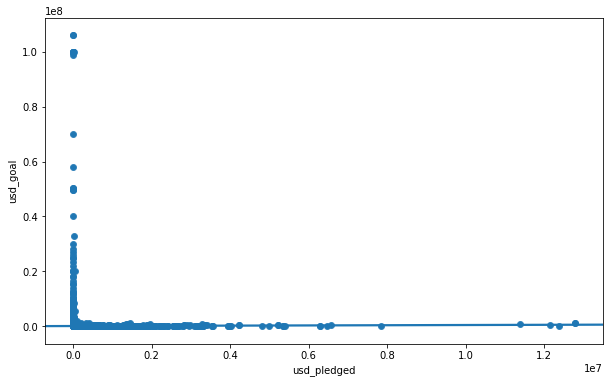

In [49]:
# show distribution of usd_pledged vs usd_goal

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=df_kickstarter['usd_pledged'], y=df_kickstarter['usd_goal']);

sns.regplot(x='usd_pledged',y='usd_goal',data=df_kickstarter, fit_reg=True) 

In [50]:
# median od usd_pledged per country
sorted_nb = df_kickstarter.groupby(['country'])['usd_pledged'].median().sort_values()
df_kickstarter.groupby(['country'])['usd_pledged'].median().sort_values()


country
MX      95.523511
IT     256.339869
ES     416.644721
BE     601.683320
IE     602.408341
AT     668.616187
DE     729.730989
NO     737.120124
AU     750.541420
CA     804.083747
DK     815.167429
SG     912.753124
FR     938.910434
GB     943.435454
SE     981.059489
NL     996.046859
US    1018.000000
NZ    1019.090946
LU    1240.490215
CH    1269.710404
JP    1943.925594
HK    3719.416000
Name: usd_pledged, dtype: float64

(0, 50000)

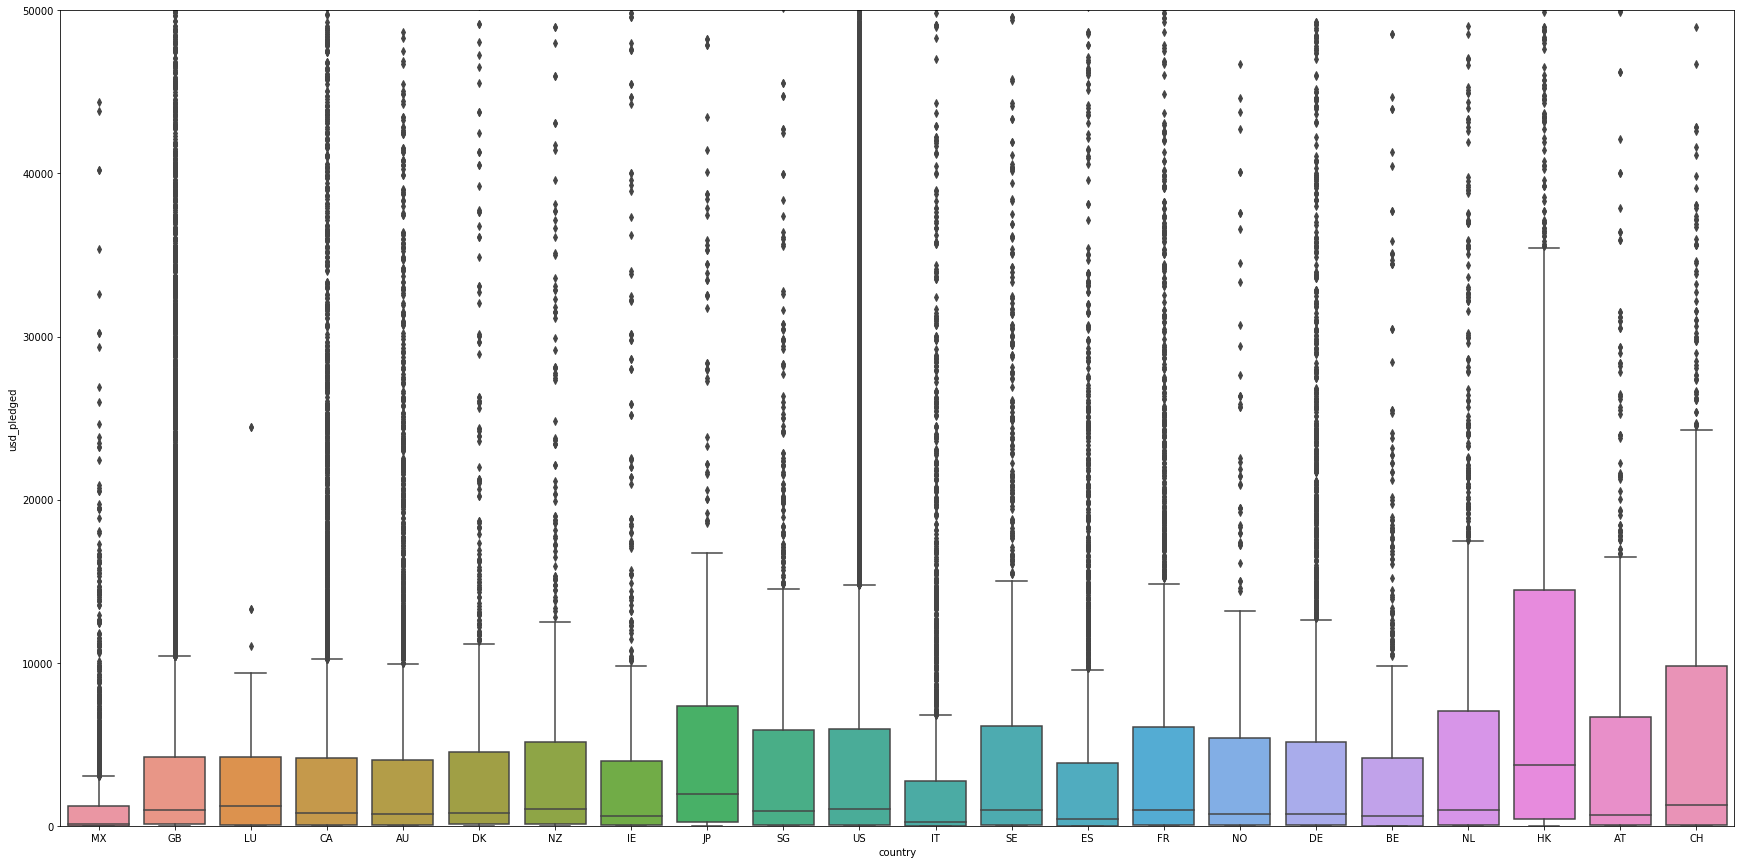

In [51]:
#Boxplot on successful projects per country
fig, ax = plt.subplots(figsize=(30,15))

sorted_nb = df_kickstarter[df_kickstarter['state_defined'] == 'successful'].groupby(['country'])['usd_pledged'].median().sort_values(ascending=True)
sns.boxplot(x=df_kickstarter['country'], y=df_kickstarter['usd_pledged'], order=list(sorted_nb.index))
ax.set_ylim([0,50000])

## Adding columns with percentages of totals (usd_pledged/usd_goal/backers_count)

In [52]:
#Adding columns with percentage of numercial values of total

df_kickstarter['% usd_goal total'] = (df_kickstarter['usd_goal']/
                                df_kickstarter['usd_goal'].sum())

df_kickstarter['% usd_pledged total'] = (df_kickstarter['usd_pledged']/
                                    df_kickstarter['usd_pledged'].sum())

df_kickstarter['% backers_count total'] = (df_kickstarter['backers_count']/
                                    df_kickstarter['backers_count'].sum())

In [53]:
#Adding columns with percentage of numercial values by country
df_kickstarter['% usd_goal by country'] = (df_kickstarter['usd_goal']/                                          
                                            df_kickstarter.groupby(['country'])['usd_goal']
                                            .transform('sum'))

df_kickstarter['% usd_pledged by country'] = (df_kickstarter['usd_pledged']/
                                              df_kickstarter.groupby(['country'])['usd_pledged']
                                              .transform('sum'))

df_kickstarter['% backers_count by country'] = (df_kickstarter['backers_count']/
                                                df_kickstarter.groupby(['country'])['backers_count']
                                                .transform('sum'))

In [54]:
# show percentages per country, split by state of projects
df_kickstarter.groupby(['country', 'state_defined'])['% usd_goal total', '% usd_pledged total', '% backers_count total', '% usd_goal by country', '% usd_pledged by country', '% backers_count by country'].sum()

% usd_goal total  % usd_pledged total  \
country state_defined                                            
AT      failed/canceled          0.003463             0.000354   
        successful               0.000667             0.005885   
AU      failed/canceled          0.019107             0.001530   
        successful               0.001970             0.014398   
BE      failed/canceled          0.005848             0.000210   
        successful               0.000495             0.002471   
CA      failed/canceled          0.026816             0.002420   
        successful               0.003978             0.029848   
CH      failed/canceled          0.038195             0.000640   
        successful               0.000995             0.006614   
DE      failed/canceled          0.056170             0.002143   
        successful               0.002764             0.020272   
DK      failed/canceled          0.002221             0.000260   
        successful               0.000549             0.004306   
ES      failed/canceled          0.014202             0.000925   
        successful               0.001354             0.012090   
FR      failed/canceled          0.017631             0.001367   
        successful               0.002746             0.017706   
GB      failed/canceled          0.049403             0.005297   
        successful               0.010522             0.077259   
HK      failed/canceled          0.003548             0.000938   
        successful               0.001493             0.015392   
IE      failed/canceled          0.001770             0.000313   
        successful               0.000343             0.001538   
IT      failed/canceled          0.024082             0.001211   
        successful               0.001349             0.012029   
JP      failed/canceled          0.001117             0.000232   
        successful               0.000548             0.003584   
LU      failed/canceled          0.000241             0.000025   
        successful               0.000072             0.000276   
MX      failed/canceled          0.007925             0.000298   
        successful               0.000583             0.001973   
NL      failed/canceled          0.006182             0.000911   
        successful               0.001169             0.008962   
NO      failed/canceled          0.003284             0.000160   
        successful               0.000339             0.001837   
NZ      failed/canceled          0.005065             0.000275   
        successful               0.000436             0.003530   
SE      failed/canceled          0.007087             0.000730   
        successful               0.001142             0.009154   
SG      failed/canceled          0.002666             0.000393   
        successful               0.000685             0.004973   
US      failed/canceled          0.593796             0.032911   
        successful               0.075982             0.692360   

                         % backers_count total  % usd_goal by country  \
country state_defined                                                   
AT      failed/canceled               0.000285               0.838516   
        successful                    0.003401               0.161484   
AU      failed/canceled               0.001826               0.906555   
        successful                    0.019015               0.093445   
BE      failed/canceled               0.000246               0.921892   
        successful                    0.002471               0.078108   
CA      failed/canceled               0.003211               0.870813   
        successful                    0.036934               0.129187   
CH      failed/canceled               0.000386               0.974621   
        successful                    0.003269               0.025379   
DE      failed/canceled               0.002146               0.953109   
        successful                    0

In [55]:
# check if calculations are ok - total should be 1 or 22 
# (each unique country of the 22 countries should sum up to 1)
(df_kickstarter[['% usd_goal total', 
                 '% usd_pledged total', 
                 '% backers_count total', 
                 '% usd_goal by country', 
                 '% usd_pledged by country', 
                 '% backers_count by country']]
                 .sum())

% usd_goal total               1.0
% usd_pledged total            1.0
% backers_count total          1.0
% usd_goal by country         22.0
% usd_pledged by country      22.0
% backers_count by country    22.0
dtype: float64

**Analyze categories by success rate**

In [56]:
# percentage of successful projects by category_lvl1
df_kickstarter.groupby('category_lvl1').state_defined.apply(lambda x: (x == 'successful').mean()).sort_values(ascending=False)

category_lvl1
comics          0.695246
dance           0.606154
theater         0.579277
games           0.533215
art             0.531887
music           0.507957
design          0.495815
publishing      0.448458
film & video    0.398699
photography     0.397858
fashion         0.362787
crafts          0.331718
food            0.260218
technology      0.239909
journalism      0.235776
Name: state_defined, dtype: float64

In [57]:
# percentage of successful projects by category_lvl2
df_kickstarter.groupby('category_lvl2').state_defined.apply(lambda x: (x == 'successful').mean()).sort_values(ascending=False)

category_lvl2
residencies           0.783333
comic books           0.727685
chiptune              0.727273
anthologies           0.725044
tabletop games        0.721204
country & folk        0.692635
illustration          0.675308
performances          0.658131
indie rock            0.650749
jazz                  0.637602
graphic novels        0.629223
webcomics             0.608852
classical music       0.603834
plays                 0.603128
art books             0.600583
narrative film        0.595622
shorts                0.580952
zines                 0.580645
immersive             0.565657
camera equipment      0.538095
knitting              0.537931
rock                  0.536054
children's books      0.527944
pottery               0.526316
musical               0.525849
typography            0.518519
metal                 0.517241
playing cards         0.516256
accessories           0.515723
product design        0.511477
photobooks            0.510424
festivals             0.5

**Show trends/compare columns**

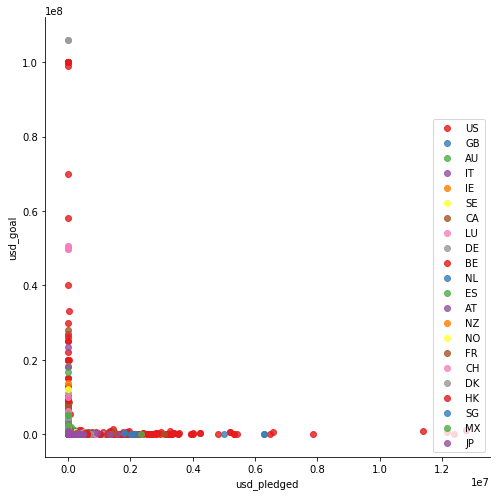

In [58]:
#Regression usd_pledged vs. usd_goal


# library & dataset
import seaborn as sns

#Size

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="usd_pledged", y="usd_goal", 
           data=df_kickstarter, fit_reg=False, 
           hue='country', legend=False, palette="Set1", height=7, aspect=1)

 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()




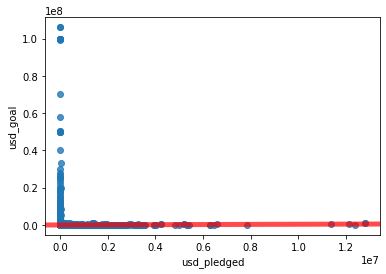

In [59]:
#Regression + trendline usd_pledged vs. usd_goal
sns.regplot(x=df_kickstarter["usd_pledged"], y=df_kickstarter["usd_goal"], line_kws={"color":"r","alpha":0.7,"lw":5})


/Users/tobiasglinzer/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


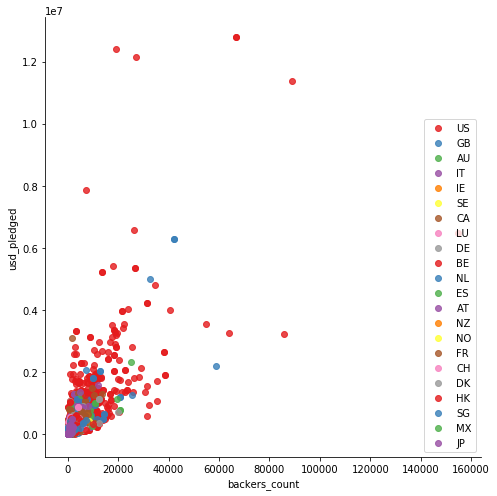

In [60]:
#showing usd_pledged vs. backers_count

# library & dataset
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="backers_count", y="usd_pledged", 
           data=df_kickstarter, fit_reg=False, 
           hue='country', legend=False, palette="Set1", size=7, aspect=1)

 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()




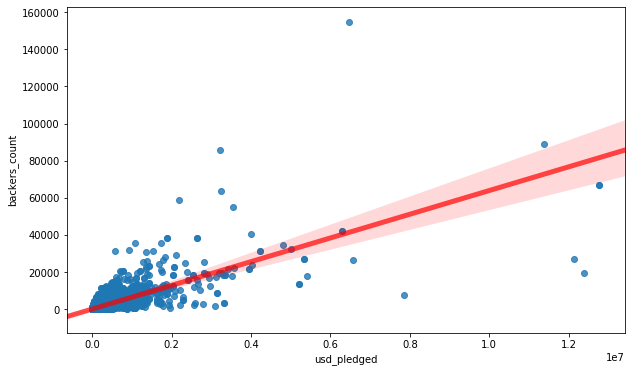

In [61]:
#Scatter plot + trendline usd_pledged vs. backers_count
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x=df_kickstarter["usd_pledged"], 
            y=df_kickstarter["backers_count"], 
            line_kws={"color":"r","alpha":0.7,"lw":5})


### Histograms

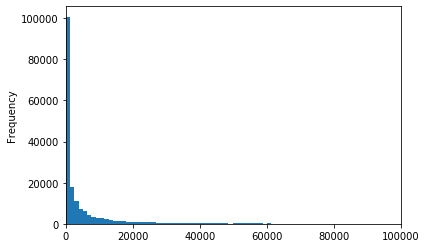

In [62]:
df_kickstarter['usd_pledged'].plot(kind="hist",
                 bins=10000,
                 xlim=(0,100000));

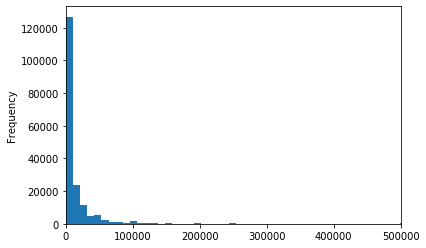

In [63]:
df_kickstarter['usd_goal'].plot(kind="hist",
                 bins=10000,
                 xlim=(0,500000));

## Export to *.csv

In [64]:
df_kickstarter.to_csv('kickstarter_analysis_2016-2019_output_TG.csv', sep=',', index=False)